# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [5]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Comparing Categories

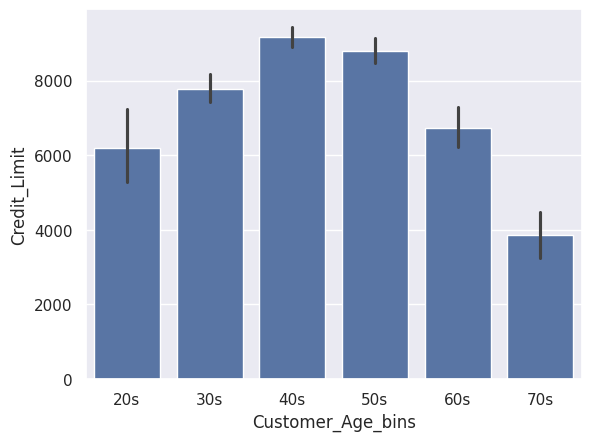

In [7]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean);

Let's see what happens when we add in `Gender`, which we can do by specifying the `Hue`.

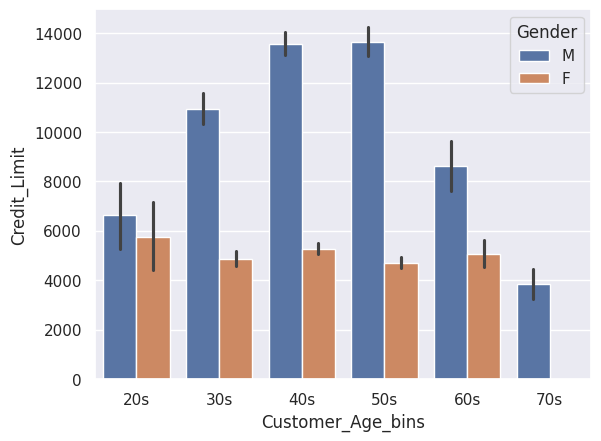

In [8]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

Let's swap that using the `estimator` parameter.

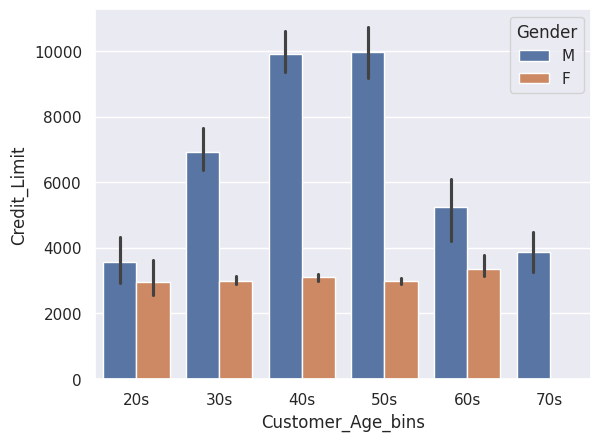

In [9]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.median);

In [10]:
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
barplot

/tmp/ipykernel_20201/3463132549.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Gender,Credit_Limit
0,20s,F,5731.101075
1,20s,M,6649.367647
2,30s,F,4867.775314
3,30s,M,10948.605311
4,40s,F,5270.821784
5,40s,M,13557.484844
6,50s,F,4702.649475
7,50s,M,13635.717041
8,60s,F,5053.412857
9,60s,M,8626.832000


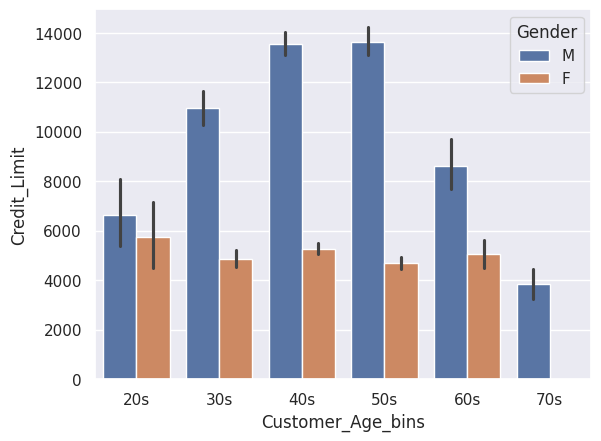

In [11]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

We can turn the visual so that the bars go horizontally with just one parameter change. 

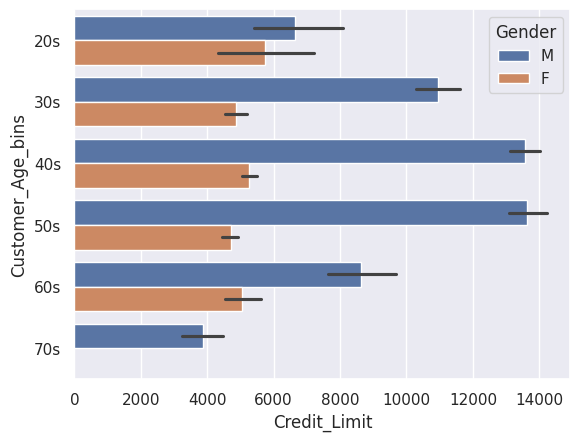

In [13]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', hue='Gender', data=data, estimator=np.mean, orient='h');

In [14]:
lollipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lollipop

/tmp/ipykernel_20201/1101180992.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_Age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


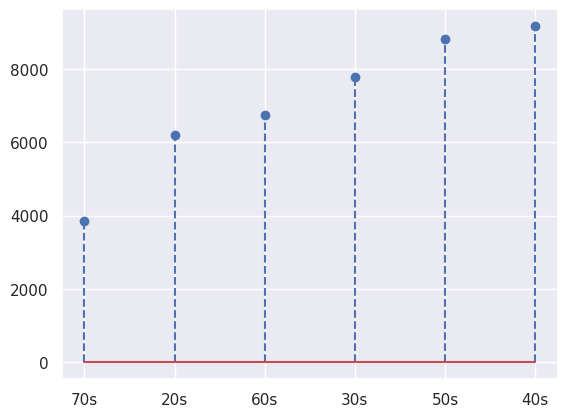

In [16]:
plt.stem(lollipop['Customer_Age_bins'], lollipop['Credit_Limit'], linefmt='--');

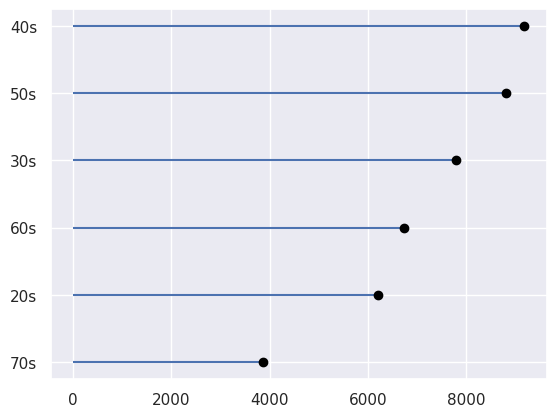

In [17]:
fig, ax = plt.subplots()
ax.hlines(lollipop['Customer_Age_bins'], xmin=0, xmax=lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'], lollipop['Customer_Age_bins'], "o", color='black');

More inspiration for Lollipop charts can be found [here](https://www.tvhahn.com/posts/beautiful-plots-lollipop/)